### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
imp=r"C:\Users\bosse\Desktop\Notebooks\Data\Project\Kaggle_dedub.csv"
df=pd.read_csv(imp,index_col='id')
df.drop(columns='Unnamed: 0',inplace=True)
display(df.head())
display(df.info())

,currency,backers_count,country,status,usd_pledged,sub_category,goal_usd,city,launched_year,duration_d,creator_projects
id,,,,,,,,,,,
1714728788,CAD,16,CA,failed,577.902078,food,785.82065,Victoria,2018,59.958333,1
1639965256,USD,7,US,successful,211.000000,publishing,93.00000,San Diego,2014,24.000000,1
1582062943,USD,99,US,successful,4697.000000,food,1500.00000,Philadelphia,2020,30.000000,1
1888984372,USD,3,US,failed,222.000000,technology,25000.00000,Chicago,2019,60.000000,1
1409770586,USD,100,US,successful,5410.000000,publishing,5000.00000,Madrid,2015,30.000000,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180677 entries, 1714728788 to 1126079486
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   currency          180677 non-null  object 
 1   backers_count     180677 non-null  int64  
 2   country           180677 non-null  object 
 3   status            180677 non-null  object 
 4   usd_pledged       180677 non-null  float64
 5   sub_category      180677 non-null  object 
 6   goal_usd          180677 non-null  float64
 7   city              180677 non-null  object 
 8   launched_year     180677 non-null  int64  
 9   duration_d        180677 non-null  float64
 10  creator_projects  180677 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 16.5+ MB


None

### Visualization

C:\Users\bosse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


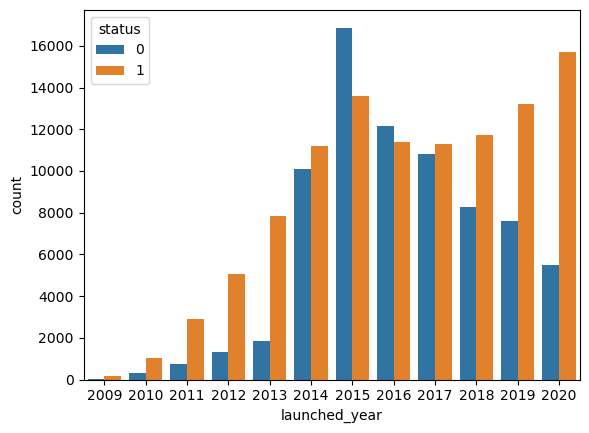

In [82]:
sns.countplot(df['launched_year'],hue=df['status']);

### Split of the data

In [3]:
df['status'].replace(['successful','failed'],[1,0],inplace=True)
df_y=df['status']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='status'),df_y,test_size=0.2,random_state=42)

### Preprocessing of the data

In [5]:
# standardizing of the numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# 
num_list=['goal_usd','duration_d','backers_count', 'usd_pledged']
X_train_num=X_train[num_list]
X_test_num=X_test[num_list]
X_train_num[num_list]=sc.fit_transform(X_train[num_list])
X_test_num[num_list]=sc.fit_transform(X_test[num_list])

C:\Users\bosse\AppData\Local\Temp\ipykernel_17952\2506531436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num[num_list]=sc.fit_transform(X_train[num_list])
C:\Users\bosse\AppData\Local\Temp\ipykernel_17952\2506531436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num[num_list]=sc.fit_transform(X_test[num_list])


In [6]:
# OneHotEncoding of the categorical variable of X_train
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
cat_list=['country','currency','sub_category','creator_projects']
ohe_train=ohe.fit_transform(X_train[cat_list])
column_name=ohe.get_feature_names_out(cat_list)
X_train_ohe=pd.DataFrame(ohe_train,columns=column_name,index=X_train.index)

In [7]:
# OHE X_test variable
ohe2=OneHotEncoder(sparse=False)
ohe_test=ohe2.fit_transform(X_test[cat_list])
column_name2=ohe2.get_feature_names_out(cat_list)
X_test_ohe=pd.DataFrame(ohe_test,columns=column_name2,index=X_test.index)

In [8]:
len(X_train['city'].value_counts())
# The variable city contain over 11000 different entries, ohe possible with so many variables?
# For the time being, city variable will be dropped

11439

In [9]:
X_train_merge=pd.concat([X_train_num,X_train_ohe],axis=1)
X_test_merge=pd.concat([X_test_num,X_test_ohe],axis=1)
X_train_merge

,goal_usd,duration_d,backers_count,usd_pledged,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,...,sub_category_music,sub_category_photography,sub_category_publishing,sub_category_technology,sub_category_theater,creator_projects_1,creator_projects_16-30,creator_projects_2-5,creator_projects_30+,creator_projects_6-15
id,,,,,,,,,,,,,,,,,,,,,
951016356,-0.012969,-0.244914,0.609384,0.349829,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242521970,-0.034624,-0.244914,-0.134191,-0.120236,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1091631676,-0.028186,0.248514,-0.045987,-0.052784,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1004851582,-0.026396,-0.141988,-0.155729,-0.129942,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2014286258,-0.026636,0.580893,-0.100345,-0.040965,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063338383,-0.034900,-0.244914,-0.091115,-0.117114,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1253472741,-0.022187,-0.244914,-0.131114,-0.116313,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
461455322,-0.033529,1.323924,-0.106499,-0.107753,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
X_test_merge

,goal_usd,duration_d,backers_count,usd_pledged,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,...,sub_category_music,sub_category_photography,sub_category_publishing,sub_category_technology,sub_category_theater,creator_projects_1,creator_projects_16-30,creator_projects_2-5,creator_projects_30+,creator_projects_6-15
id,,,,,,,,,,,,,,,,,,,,,
511292126,-0.014612,-0.236854,0.005060,0.096716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1513860278,-0.030999,-0.240284,-0.159353,-0.113855,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
439069323,0.110551,-0.039101,2.071961,1.325513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010797924,-0.037198,0.006649,-0.162709,-0.116203,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157002480,-0.034375,-0.240284,-0.096720,-0.073473,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606787003,-0.037198,-0.240284,-0.117970,-0.105129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1957236336,-0.035316,0.582825,-0.125800,-0.090071,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21931240,-0.037782,-0.240284,-0.159353,-0.115381,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
for item in X_train_merge.columns:
    if item not in X_test_merge.columns:
        print('error',item)

error country_SI
error currency_PLN


### Modelling of the data

Which model to chose?
- Classification. tree or regression?

Which metric to evaluate?
- Eigentlich ja nur Modelle mit den Daten füttern Verbindung zum Project eher unwichtig, keine Projektdaten



In [12]:
# Maschine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
X_train_merge.drop(['country_SI','currency_PLN'],axis=1,inplace=True)

In [14]:
# Classification tree
tree=DecisionTreeClassifier()
tree.fit(X_train_merge,y_train)
tree_pred=tree.predict(X_test_merge)
print('Decision Tree R2 value:',tree.score(X_test_merge,y_test))

Decision Tree R2 value: 0.826737879123312


In [15]:
# Logistical Regression
log=LogisticRegression()
log.fit(X_train_merge,y_train)
log_pred=log.predict(X_test_merge)
print('Logistical Regression R2 value:',log.score(X_test_merge,y_test))

Logistical Regression R2 value: 0.9042229355767102


C:\Users\bosse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Crosstab
print('Decision Tree')
display(pd.crosstab(y_test,tree_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Logistical Regression')
display(pd.crosstab(y_test,log_pred,normalize=True, rownames=['True'], colnames=['Prediction']))

Decision Tree


Prediction,0,1
True,,
0,0.247067,0.172487
1,0.000775,0.579671


Logistical Regression


Prediction,0,1
True,,
0,0.383247,0.036307
1,0.059470,0.520976


In [17]:
# Classification Report
from sklearn.metrics import classification_report
print('Decision Tree \n',classification_report(y_test,tree_pred))
print('Logistical Regression \n',classification_report(y_test,log_pred))

Decision Tree 
               precision    recall  f1-score   support

           0       1.00      0.59      0.74     15161
           1       0.77      1.00      0.87     20975

    accuracy                           0.83     36136
   macro avg       0.88      0.79      0.81     36136
weighted avg       0.87      0.83      0.82     36136

Logistical Regression 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     15161
           1       0.93      0.90      0.92     20975

    accuracy                           0.90     36136
   macro avg       0.90      0.91      0.90     36136
weighted avg       0.91      0.90      0.90     36136



In [18]:
df_y.value_counts(normalize=True)

1    0.58169
0    0.41831
Name: status, dtype: float64

In [19]:
# Conclusion
print('we can see that the logistical regresson has the better overall value with a F1 Score of 0.9, it interesting that the decision tree has significant lower values for false positives')

we can see that the logistical regresson has the better overall value with a F1 Score of 0.9, it interesting that the decision tree has significant lower values for false positives


In [66]:
# Feature Importance as a DataFrame
tree_importance=pd.DataFrame({'Variables':X_train_merge.columns,'Importance':tree.feature_importances_})
tree_importance.sort_values('Importance',inplace=True,ascending=False)
display(tree_importance)

,Variables,Importance
2,backers_count,0.604477
0,goal_usd,0.213766
3,usd_pledged,0.179745
1,duration_d,0.000432
27,country_US,0.000179
...,...,...
45,sub_category_dance,0.000000
24,country_PL,0.000000
26,country_SG,0.000000
30,currency_CHF,0.000000


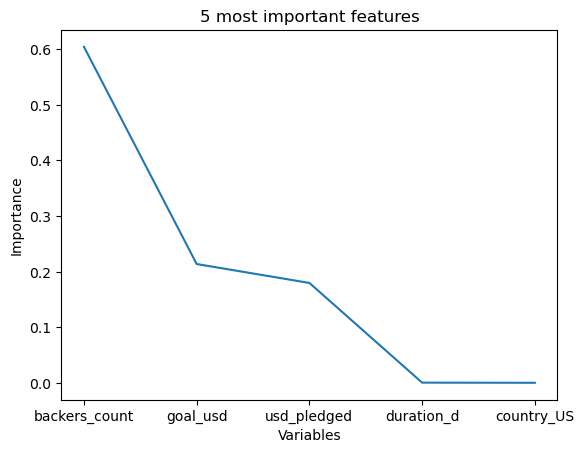

In [67]:
# Visualisation Feature importance Decision Tree
plt.plot(tree_importance['Variables'][0:5],tree_importance['Importance'][0:5])
plt.ylabel('Importance')
plt.xlabel('Variables')
plt.title('5 most important features');

In [56]:
# Buildung the Coefficient DataFrame
log_importance=pd.DataFrame({'Variables':X_train_merge.columns,'Coefficient':log.coef_[0]})
display(log_importance)
log_importance_negatives=log_importance.sort_values('Coefficient',ascending=True)
log_importance_positives=log_importance.sort_values('Coefficient',ascending=False)

,Variables,Coefficient
0,goal_usd,-69.255337
1,duration_d,-0.261932
2,backers_count,40.161524
3,usd_pledged,7.075187
4,country_AT,-0.182586
...,...,...
57,creator_projects_1,-1.333001
58,creator_projects_16-30,1.185025
59,creator_projects_2-5,-0.837938
60,creator_projects_30+,3.614492


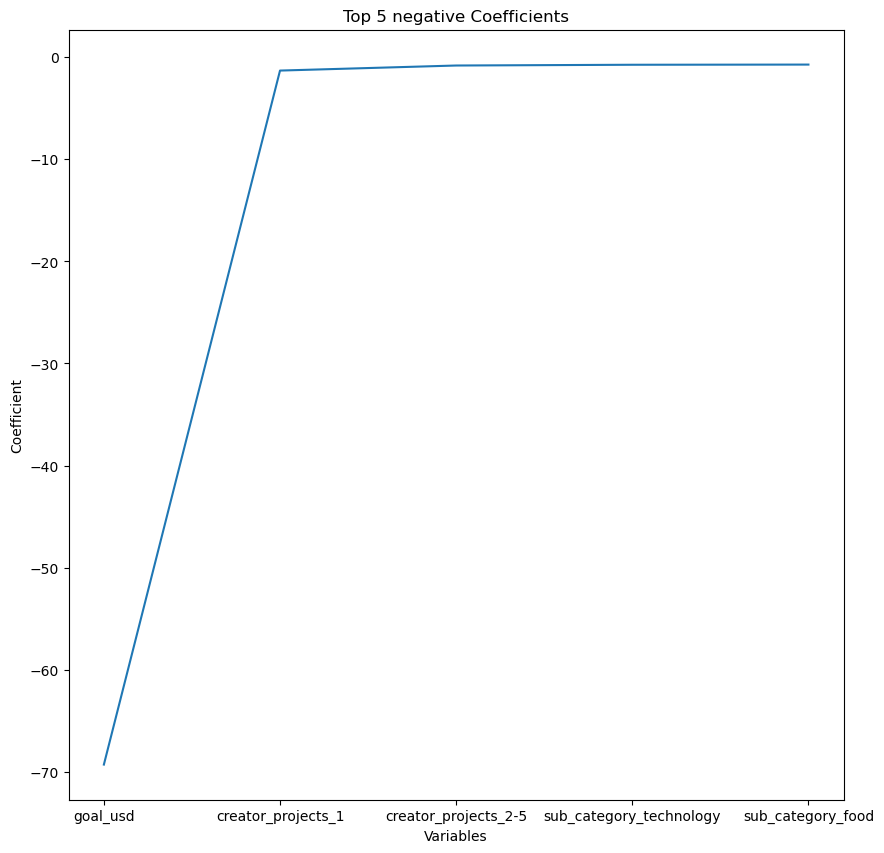

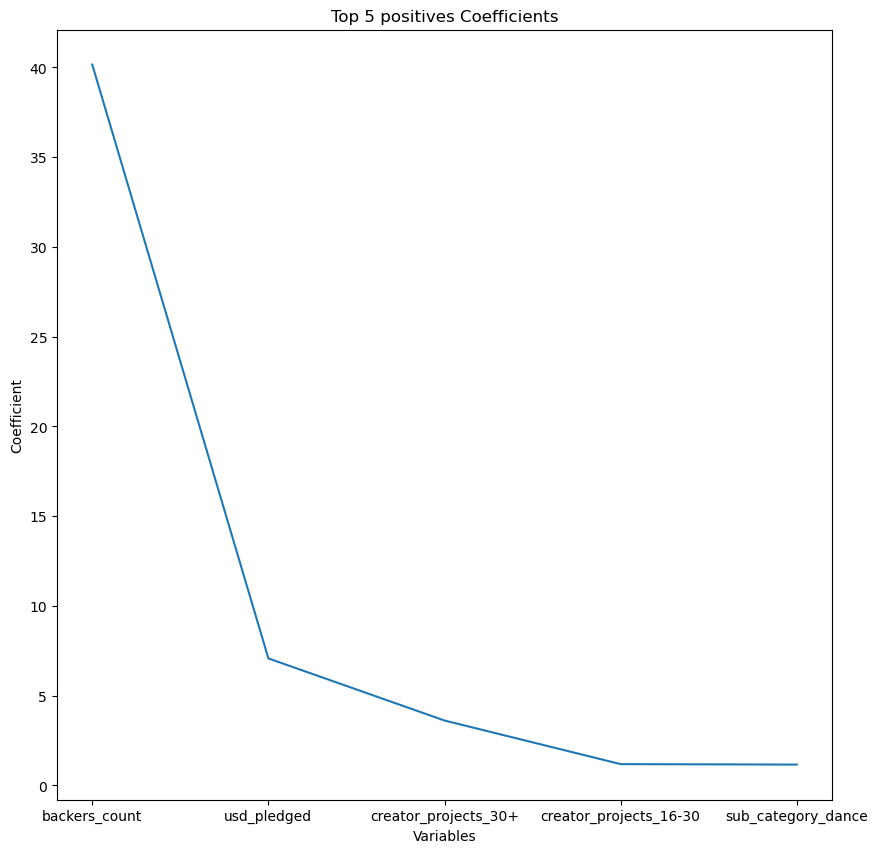

In [70]:
# Plotting the Coefficeint DataFrame
plt.figure(figsize=[10,10])
plt.plot(log_importance_negatives['Variables'][0:5],log_importance_negatives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.title('Top 5 negative Coefficients');
plt.show()
plt.figure(figsize=[10,10])
plt.plot(log_importance_positives['Variables'][0:5],log_importance_positives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.title('Top 5 positives Coefficients');

### First results